# Business Case: Walmart - Confidence Interval and CLT




### About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### STEP 1:- IMPORT AND EXPLORING THE DATA

In [ ]:
# Reading the data set

df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [ ]:
# Glimpse of data

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Shape of the Dataset
# To get idea about the dimension of data
df.shape

(550068, 10)

In [ ]:
#info about the dataset
#Exploring the Attributes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


For this case, We will focus upon Gender, Age, Marital Status and their Purchase Pattern.

In [ ]:
# Purchase is the only Numerical Column . So some statistical analysis
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

 Conversion of some column into category

---



In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [ ]:
print("Data Types of Attributes:")
print(df.dtypes)

Data Types of Attributes:
User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                       int64
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object


## STEP 2:- DATA PREPROCESSING
### Missing value Check

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### Detect and handle outliers

In [ ]:
z_scores = np.abs(stats.zscore(df["Purchase"]))
z_scores

0         0.177973
1         1.181756
2         1.561193
3         1.633858
4         0.257805
            ...   
550063    1.771025
550064    1.770428
550065    1.817013
550066    1.771623
550067    1.746737
Name: Purchase, Length: 550068, dtype: float64

Data is already preprocessed and has no significant outliers and null values.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Step 3: Data Exploration
### Non-Graphical Analysis
Performing Value Counts

GENDER

In [ ]:
print("Value Counts for Gender:")
print(df['Gender'].value_counts(normalize=True))

Value Counts for Gender:
M    0.753105
F    0.246895
Name: Gender, dtype: float64


In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


AGE

In [ ]:
print("Value Counts for Age:")
print(df['Age'].value_counts())

Value Counts for Age:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


MARITAL STATUS

In [ ]:
print("Value Counts for Marital Status:")
print(df['Marital_Status'].value_counts())

Value Counts for Marital Status:
0    324731
1    225337
Name: Marital_Status, dtype: int64


In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


### Visualisation

#### Univariate

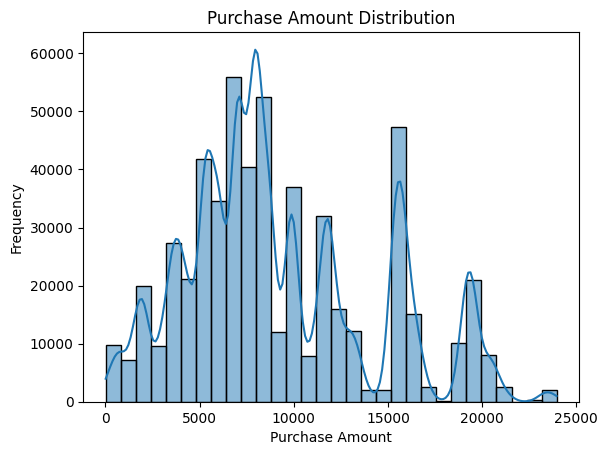

In [ ]:
sns.histplot(df["Purchase"], bins=30, kde=True)
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

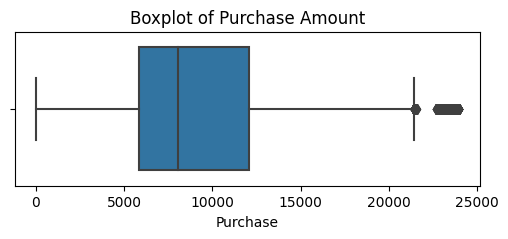

In [ ]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Purchase'])
plt.title("Boxplot of Purchase Amount")
plt.show()

GENDER

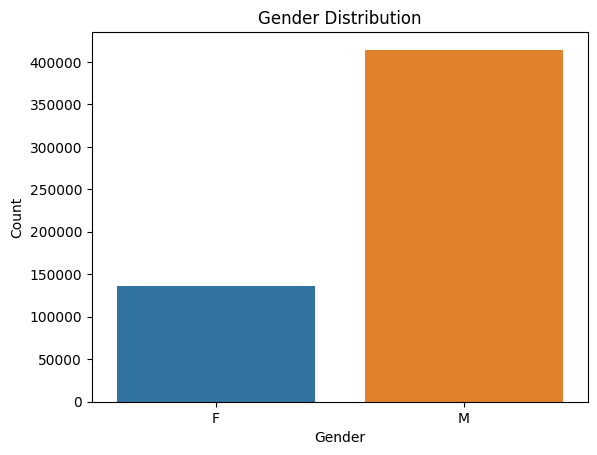

In [ ]:
sns.countplot(x="Gender",data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

We have almose 75% male dominant data

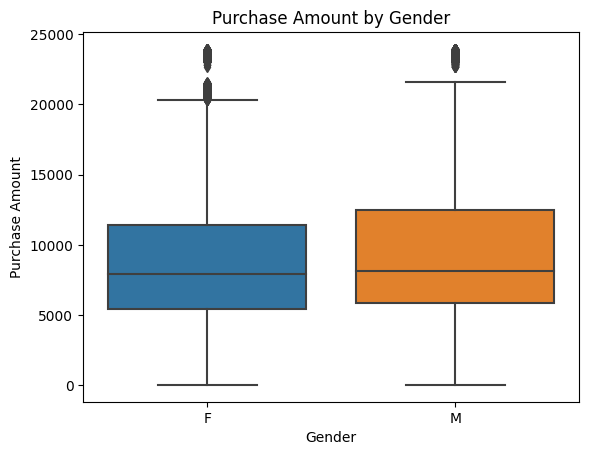

In [ ]:
sns.boxplot(x="Gender", y="Purchase", data=df)
plt.title("Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
plt.show()

Martital Status

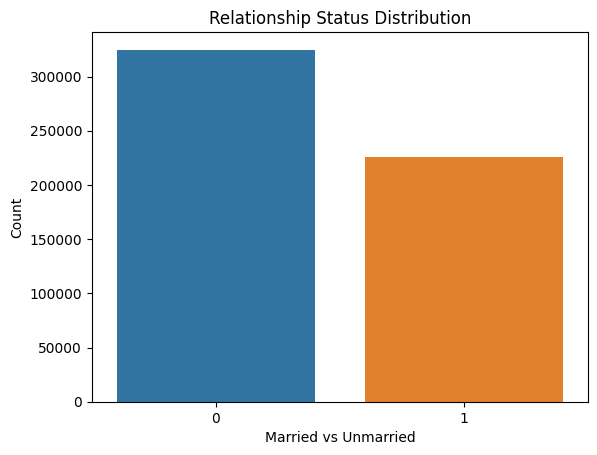

In [ ]:
sns.countplot(x="Marital_Status",data=df)
plt.title("Relationship Status Distribution")
plt.xlabel("Married vs Unmarried")
plt.ylabel("Count")
plt.show()

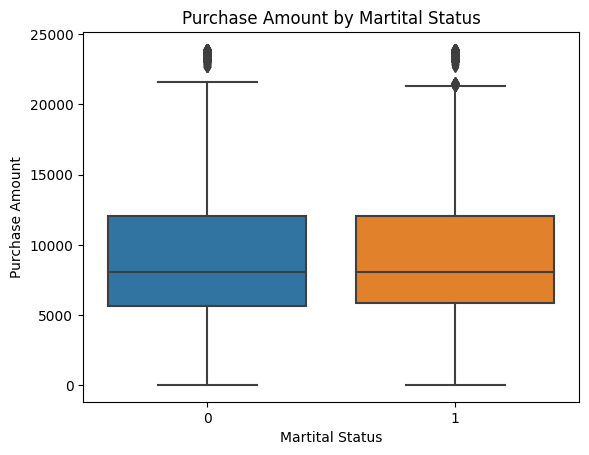

In [ ]:
sns.boxplot(x="Marital_Status", y="Purchase", data=df)
plt.title("Purchase Amount by Martital Status")
plt.xlabel("Martital Status")
plt.ylabel("Purchase Amount")
plt.show()

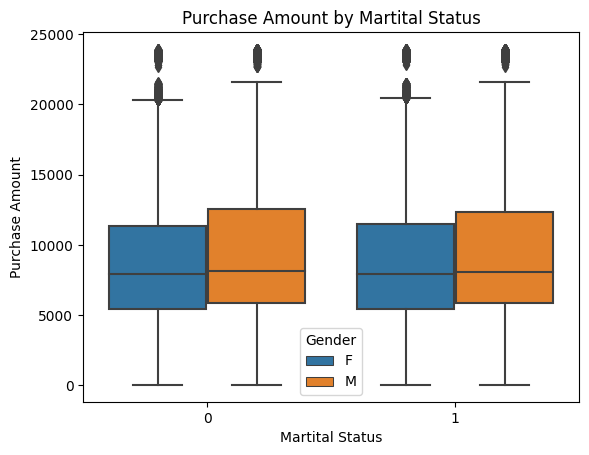

In [ ]:
sns.boxplot(x="Marital_Status", y="Purchase", data=df, hue="Gender")
plt.title("Purchase Amount by Martital Status")
plt.xlabel("Martital Status")
plt.ylabel("Purchase Amount")
plt.show()

Age

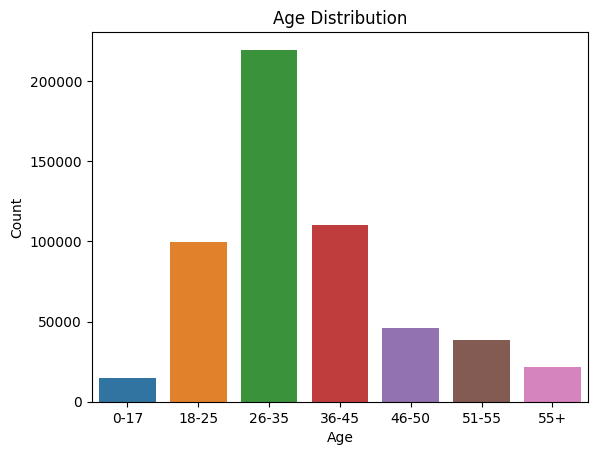

In [ ]:
sns.countplot(x="Age",data=df)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

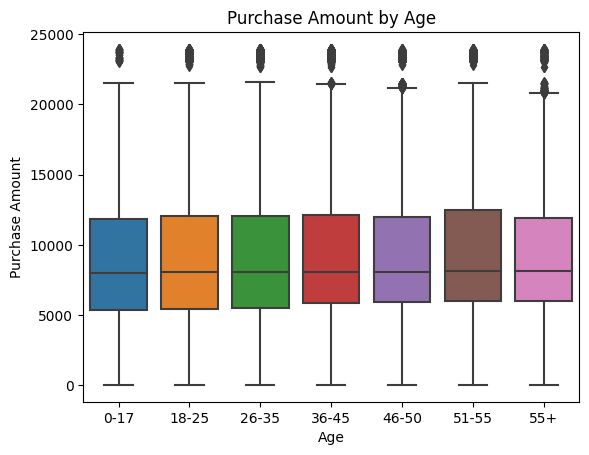

In [ ]:
sns.boxplot(x="Age", y="Purchase", data=df)
plt.title("Purchase Amount by Age")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.show()

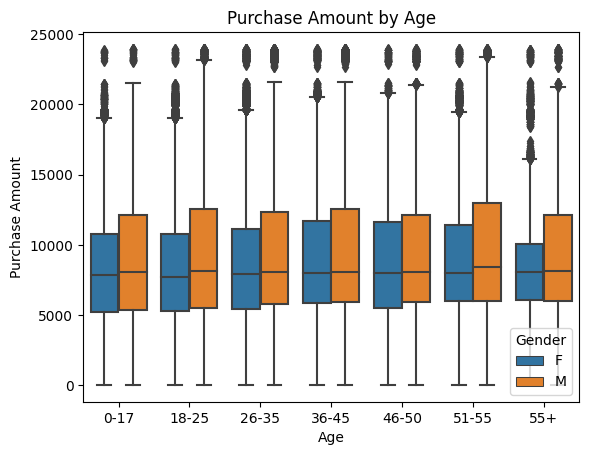

In [ ]:
sns.boxplot(x="Age", y="Purchase", data=df,hue='Gender')
plt.title("Purchase Amount by Age")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.show()

We can see that there is alot of overlapping in the data.

### Correlation Analysis

<ipython-input-129-afd37bdd12f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


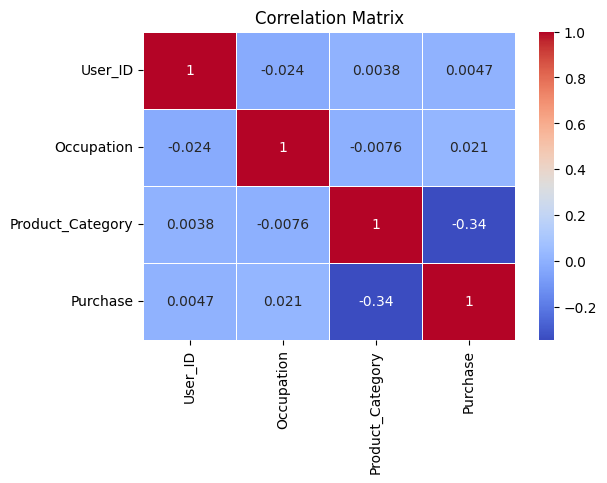

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

There is not much correlation between numerical data

# Step 4: Analyzing Male vs. Female Spendings

In [ ]:
male_avg_spending = df[df["Gender"] == "M"]["Purchase"].mean()
female_avg_spending = df[df["Gender"] == "F"]["Purchase"].mean()
print(f"Average Male Spending: ${male_avg_spending:.2f}")
print(f"Average Female Spending: ${female_avg_spending:.2f}")

Average Male Spending: $9437.53
Average Female Spending: $8734.57


In [ ]:
male_med_spending = df[df["Gender"] == "M"]["Purchase"].median()
female_med_spending = df[df["Gender"] == "F"]["Purchase"].median()
print(f"Median Value of Male Spending: ${male_med_spending:.2f}")
print(f"Median Value of Female Spending: ${female_med_spending:.2f}")

Median Value of Male Spending: $8098.00
Median Value of Female Spending: $7914.00


Male Average Spending is more than Female Customer.

# Step 5: Confidence Intervals using Central Limit Theorem

In [ ]:
sample_size = 1000
male_sample = df[df["Gender"] == "M"]["Purchase"].sample(sample_size)
female_sample = df[df["Gender"] == "F"]["Purchase"].sample(sample_size)

In [ ]:
male_std_error = male_sample.std() / np.sqrt(sample_size)
female_std_error = female_sample.std() / np.sqrt(sample_size)

In [ ]:
print(male_std_error,"Male")
print(female_std_error,"Female")

162.87258436641264 Male
154.10425298853096 Female


In [ ]:
confidence_level=[0.90,0.95,0.99]
for level in confidence_level:
  z_score = stats.norm.ppf((1 + level) / 2)

  male_confidence_interval = (male_sample.mean() - z_score * male_std_error,
                            male_sample.mean() + z_score * male_std_error)
  female_confidence_interval = (female_sample.mean() - z_score * female_std_error,
                              female_sample.mean() + z_score * female_std_error)

  print("Confidence_level --",level*100,"%")
  print(f"Male Confidence Interval : ({male_confidence_interval[0]:.2f}, {male_confidence_interval[1]:.2f})")
  print(f"Female Confidence Interval : ({female_confidence_interval[0]:.2f}, {female_confidence_interval[1]:.2f})")
  if male_confidence_interval[1] < female_confidence_interval[0] or female_confidence_interval[1] < male_confidence_interval[0]:
    print("Confidence intervals do not overlap. There is a significant difference in spending between genders.")
  else:
    print("Confidence intervals overlap. There may not be a significant difference in spending between genders.")

  print()

Confidence_level -- 90.0 %
Male Confidence Interval : (8965.71, 9501.51)
Female Confidence Interval : (8421.22, 8928.17)
Confidence intervals do not overlap. There is a significant difference in spending between genders.

Confidence_level -- 95.0 %
Male Confidence Interval : (8914.39, 9552.84)
Female Confidence Interval : (8372.66, 8976.73)
Confidence intervals overlap. There may not be a significant difference in spending between genders.

Confidence_level -- 99.0 %
Male Confidence Interval : (8814.08, 9653.14)
Female Confidence Interval : (8277.75, 9071.64)
Confidence intervals overlap. There may not be a significant difference in spending between genders.



As we increase Confidence level , There is less Significant difference in spending Between Genders. So We can't comment on Who spends more.

# MARRIED VS UNMARRIED

In [ ]:
average_married_spending = df[df['Marital_Status'] == 1]['Purchase'].mean()
average_unmarried_spending = df[df['Marital_Status'] == 0]['Purchase'].mean()

print(f"Average spending for married customers: ${average_married_spending:.2f}")
print(f"Average spending for unmarried customers: ${average_unmarried_spending:.2f}")

Average spending for married customers: $9261.17
Average spending for unmarried customers: $9265.91


Average spending is almost same for married vs unmarried.

In [ ]:
sample_married = df[df['Marital_Status'] == 1]['Purchase']
sample_unmarried = df[df['Marital_Status'] == 0]['Purchase']

sample_size_married = len(sample_married)
sample_size_unmarried = len(sample_unmarried)

sample_mean_married = sample_married.mean()
sample_mean_unmarried = sample_unmarried.mean()

sample_std_married = sample_married.std()
sample_std_unmarried = sample_unmarried.std()

confidence_level = 0.90
z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error_married = z_score * (sample_std_married / np.sqrt(sample_size_married))
margin_of_error_unmarried = z_score * (sample_std_unmarried / np.sqrt(sample_size_unmarried))

confidence_interval_married = (sample_mean_married - margin_of_error_married, sample_mean_married + margin_of_error_married)
confidence_interval_unmarried = (sample_mean_unmarried - margin_of_error_unmarried, sample_mean_unmarried + margin_of_error_unmarried)

print(f"Confidence Interval for Married Spending: {confidence_interval_married}")
print(f"Confidence Interval for Unmarried Spending: {confidence_interval_unmarried}")

Confidence Interval for Married Spending: (9243.790713903045, 9278.558434261702)
Confidence Interval for Unmarried Spending: (9251.396385823671, 9280.418852019342)


In [ ]:
if confidence_interval_married[1] < confidence_interval_unmarried[0] or confidence_interval_unmarried[1] < confidence_interval_married[0]:
    print("Confidence intervals do not overlap. There is a significant difference in spending between genders.")
else:
    print("Confidence intervals overlap. There may not be a significant difference in spending between genders.")

Confidence intervals overlap. There may not be a significant difference in spending between genders.


There is a lot of overlapping . So for married vs unmarried there is no significant difference with only 90% level.

# AGE


In [ ]:
average_spending_by_age = df.groupby('Age')['Purchase'].mean()
print("Average spending by age group:")
print(average_spending_by_age)

Average spending by age group:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


In [ ]:
confidence_intervals_by_age = {}
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
for age_group, group_data in df.groupby('Age'):
    sample = group_data['Purchase']
    sample_size = len(sample)
    sample_mean = sample.mean()
    sample_std = sample.std()

    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    confidence_intervals_by_age[age_group] = confidence_interval

print("Confidence Intervals by Age Group:")

for age_group, group_data in df.groupby('Age'):
  print(age_group,"---",confidence_intervals_by_age[age_group])

Confidence Intervals by Age Group:
0-17 --- (8851.947970542686, 9014.981310347262)
18-25 --- (9138.407948753442, 9200.919263769136)
26-35 --- (9231.733676400028, 9273.647589339747)
36-45 --- (9301.669410965314, 9361.031978870433)
46-50 --- (9163.085142648752, 9254.166252287903)
51-55 --- (9483.991472776577, 9585.624589143894)
55+ --- (9269.29883441773, 9403.262084481079)


We can see overlapping intervals in this stats as well.

##Insights

When there is overlapping in confidence intervals, it suggests that there isn't a statistically significant difference. Here are some business conclusions and implications based on this analysis:

1. Gender:

Walmart's marketing and product offerings appear to be equally appealing to both genders during Black Friday.
Marketing efforts should continue to target a broad audience without specific gender-based strategies.

2. Marital Status:

Walmart's Black Friday deals attract both married and unmarried customers equally in terms of spending.
Marketing strategies should be designed to appeal to a broad range of customers regardless of their marital status.

3. Age Groups:

Walmart's Black Friday sales seem to attract customers from various age groups with similar spending patterns.
Marketing efforts should be focused on a wide age range of customers, acknowledging that different age groups have different preferences.

Overall Implications:

Walmart can continue to offer a consistent shopping experience during Black Friday, targeting a diverse customer base.
While there may not be significant spending differences based on gender, marital status, or age, Walmart should focus on understanding the specific preferences and needs of different customer segments to tailor its marketing and product offerings more effectively.Explore whether there are specific product categories or demographics within each group that could be targeted for improvement.

